# <center>Assignment 1</center>

There are 2 main parts asked in this assignment - Tensorflow Basics and Neural Networks. You can choose to code in Python2 or Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [0]:
from __future__ import print_function,division
%matplotlib inline
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np

## Tensorflow - Basics

### I. Linear Regression

<b>1a. Creating Sample Data </b>

In [0]:
x = np.random.randn(100,3) # 100 data points of dimension 3
w = np.array([[1],[2],[3]])
b = 10
y = np.array((x * w.transpose()).sum(axis=1)+b).reshape(100,1) # Write code to create the target. Use Numpy operations

**1b. Plot Data**

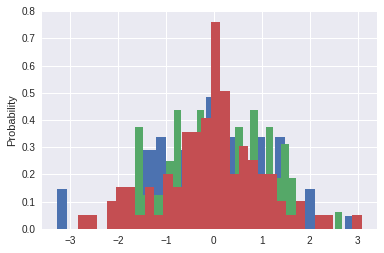

In [3]:
# Explore the data by plotting whatever makes you understand the problem better. 
# Your code here.
for i in range(3):
  plt.hist(x[:,i], normed=True, bins=30)
  plt.ylabel('Probability');



<b>2. Creating Placeholders</b>

In [0]:
X = tf.placeholder(dtype=tf.float32,shape=[None,3]) 
Y_Expected = tf.placeholder(dtype=tf.float32,shape=[100,1]) # Write code to create the placeholder for target.

<b>3. Creating Variables</b>

In [0]:
b = tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=(1,1)),name="b")
W = tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=[3,1]),name="w") # Write code to instantiate W with zeros. 

<b> 4. Creating Compute Graph </b>

In [0]:
Y = tf.add(tf.matmul(X, W), b) # Define the equation to compute the output variable.
cost = tf.reduce_sum(tf.pow(Y_Expected-Y, 2))/(2*100) # Define the cost function.  

<b> 5. Training and optimizer </b>

In [7]:
# This part has been done for you already! Just run it after you finish coding the above sections. 
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)
for epoch in range(30):
    epoch_cost,_ = sess.run([cost,train_op],feed_dict={X:x,Y_Expected:y})
    print (epoch,epoch_cost)

0 56.14354
1 45.44863
2 36.837368
3 29.891996
4 24.281485
5 19.742783
6 16.066317
7 13.0847225
8 10.664023
9 8.6967535
10 7.0965357
11 5.793817
12 4.732503
13 3.8672736
14 3.1614718
15 2.5854023
16 2.1149824
17 1.7306633
18 1.4165558
19 1.1597369
20 0.9496863
21 0.77783513
22 0.6371973
23 0.5220743
24 0.42781603
25 0.35062438
26 0.28739655
27 0.2355982
28 0.19315626
29 0.15837568


<b> 5. Print out parameters </b>

In [8]:
# Replace the None with the correct operation. You should get W close to [[1],[2],[3]] and b close to 10. 
print("W:",sess.run(W))
print("b:",sess.run(b))

W: [[0.8468066]
 [1.96483  ]
 [2.8201952]]
b: [[9.532655]]


### II. Matrix Multiplication

In [0]:
def ndmatmul():
    """
      # 3d x 2d Matmul operation. 
      You may find some of these functions useful: einsum, tile, expand_dims.
      :return a: Placeholder for 3d tensor [float64]
              b: Placeholder for 2d tensor [float64]
              c: Matrix Product
      """
    a = tf.placeholder(dtype=tf.float64,shape=[5,2,3])
    b = tf.placeholder(dtype=tf.float64,shape=[3,1])
    c = tf.einsum('abc,cd->abd',a,b)
    return a,b,c

In [0]:
A,B,C = ndmatmul()

In [11]:
np.random.seed(1)
a = np.random.randn(5,2,3)
b = np.random.randn(3,1)
c = np.matmul(a,b)
print(a.shape)
print(b.shape)
print(c.shape)
print(c)

(5, 2, 3)
(3, 1)
(5, 2, 1)
[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]


In [12]:
# Will give error if function not implemented. Your output should match Numpy's output.
sess = tf.InteractiveSession()
c_tensor = sess.run(C,feed_dict={A:a,
                            B:b})
print(c_tensor)
if (c_tensor-c<10**-10).all():
    print("Correct!")

[[[-0.51783421]
  [ 1.98033132]]

 [[-1.12404125]
  [ 1.00805567]]

 [[-0.40371716]
  [ 1.43240346]]

 [[ 0.49588387]
  [-1.49477015]]

 [[-0.26736846]
  [ 0.38907473]]]
Correct!


### III. Experiments with Feed-forward NN on MNIST

In this Qn, you will experiment with Feed-forward Neural nets while training on the MNIST dataset. Read more about it <a href = "https://en.wikipedia.org/wiki/MNIST_database">here</a>. A random sample of the images has been shown to you. 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


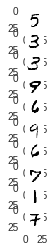

In [4]:
# Load MNIST Data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
print(train_data.shape)
print(train_labels.shape)
print(eval_data.shape)
print(eval_labels.shape)
# Randomly choose 10 images from first 50 images of Train Data.
for index,idx in enumerate(random.sample(range(50),10)): 
    plt.subplot(10,1,index+1)
    plt.imshow(train_data[idx].reshape(28,28))

Fill in the following snippet as per the instructions. 
* For initialising placeholders, use None to accommodate variable batch_size. 
* Do not change the seed; use it for comparing epoch-wise loss with your friends.
* You can use the following <a href ="https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners">tutorial</a> for reference. Note that they use softmax in their example, while you are required to code Feedforward neural network. 


In [0]:
def initializer_1(shape):
    # Do not change the seed.
    np.random.seed(1)
    return np.random.randn(*shape)

def initializer_2(shape):
    # Do not change the seed.
    np.random.seed(1)
    return 0.01 * np.random.randn(*shape)


class MNIST_ANN:
    def __init__(self, hidden_units, activations, initializer):
        """
        Initialise the weights and build the compute graph. Use AdamOptimizer with default parameters.
        :param hidden_units - list of number of hidden units.
               Eg: [10,20] => Layer 1 has 10 hidden units and Layer 2 has 20.
        :param activations - list of activations for each of the hidden layers.
               Eg: [tf.nn.sigmoid, tf.nn.tanh]
        :param intializer - the reference to the function used for intializing the weights
        """
        # Define the placeholders
        self.input =tf.placeholder(dtype=tf.float32,shape=[None,784])


        self.expected_output = tf.placeholder(dtype=tf.float32,shape=[None,10])

        # Initialise the weights and biases. Use zeros for the biases.
        weights = [tf.Variable(dtype=tf.float32,initial_value=initializer([784,hidden_units[0]]))]
        biases = [tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=[1,hidden_units[0]]))]

        # Loop here.
        for i in range(len(hidden_units)-1):
            biases.append(tf.Variable(dtype=tf.float32,initial_value=np.zeros(shape=[1,hidden_units[i+1]])))
            weights.append(tf.Variable(dtype=tf.float32,initial_value=initializer([hidden_units[i],hidden_units[i+1]])))

        biases.append(tf.Variable(dtype=tf.float32, initial_value=np.zeros(shape=[1,10])))
        weights.append(tf.Variable(dtype=tf.float32, initial_value=initializer([hidden_units[len(hidden_units)-1], 10])))



        def graph_Builder(x):
            for i in range(len(activations)):
                x = activations[i](tf.matmul(x, weights[i]) + biases[i])
            logit= tf.matmul(x, weights[len(activations)]) + biases[len(activations)]
            pred=tf.nn.softmax(logit)
            return logit,pred

        # Build the graph for computing output.
        self.output,self.pred=graph_Builder(self.input)

        # # Define the loss and accuracy here. (Refer Tutorial)
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.output,labels=self.expected_output))

        self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.pred, 1), tf.argmax(self.expected_output, 1)), tf.float32))
        #
        # # Instantiate the optimizer
        optimizer=tf.train.AdamOptimizer()
        #
        self.train_op = optimizer.minimize(self.cost)
        self.session = tf.Session()
        #
        # # Initialize all variables
        self.init=tf.global_variables_initializer()

    def train(self, train_data, train_labels, eval_data, eval_labels, batch_size, epochs=100):
        """
        Training code.
        """
        sess = self.session
        sess.run(self.init)

        # Slice the data and labels into batches depending on the batch_size.
        batches = [[train_data[k:k+batch_size],train_labels[k:k+batch_size]] for k in range(0,len(train_data),batch_size)]

        for epoch in range(epochs):
            cost_epoch = 0
            for batch in batches:
                # Forward Propagate, compute cost and backpropagate.
                cost, _ = sess.run([self.cost, self.train_op], feed_dict={self.input: batch[0],
                                                                          self.expected_output: batch[1]})
                cost_epoch += cost
            if epoch % 10 == 0:
                print("Train accuracy: {}".format(self.compute_accuracy(train_data, train_labels)))
                print("Test accuracy: {}".format(self.compute_accuracy(eval_data, eval_labels)))
            print("Epoch {}: {}".format(epoch, cost_epoch))
        print("Train accuracy: {}".format(self.compute_accuracy(train_data, train_labels)))
        print("Test accuracy: {}".format(self.compute_accuracy(eval_data, eval_labels)))

    def compute_accuracy(self, data, labels):
        """
        Fill in code to compute accuracy
        """

        _,acc= self.session.run([self.output,self.accuracy],feed_dict={self.input: data, self.expected_output: labels})

        return acc

In [15]:
ann = MNIST_ANN([10],[tf.nn.sigmoid],initializer_1)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)

Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.8649483
Epoch 1: 3275.00305783
Epoch 2: 2590.16955168
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262


The expected output for the above snippet is
<pre>
Train accuracy: 0.780763626099
Test accuracy: 0.791599988937
Epoch 0: 6768.86486949
Epoch 1: 3275.00310887
Epoch 2: 2590.16959983
Train accuracy: 0.873399972916
Test accuracy: 0.876900017262
</pre>
If you get any other output and you feel you are correct, you can proceed (However, I cannot think of any case where you can get a different output). 

### Answer the following questions by running code snippets. Unless asked explicitly (like in Q1 and Q4), you need to just show the system performance and need not comment.

**1. Use 1 hidden layer of 10 hidden units with sigmoid activation and batch_size=10 for this question. Observe the network performance for initializer_1 and initializer_2 and explain the behavior. Why does this happen? What is your guess for tanh and relu? Why?**

In [9]:
#@title Default title text
# Your code here.
print ("Using initializer_2 for weights initialization")
ann = MNIST_ANN([10],[tf.nn.sigmoid],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)
print ("\n\nusing relu activation network performance with initialization_1")
ann = MNIST_ANN([10],[tf.nn.relu],initializer_1)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)
print ("\n\nusing tanh activation network performance with initialization_1")
ann = MNIST_ANN([10],[tf.nn.tanh],initializer_1)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)

print ("\n\nusing relu activation network performance with initialization_2")
ann = MNIST_ANN([10],[tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)
print ("\n\nusing tanh activation network performance with initialization_1")
ann = MNIST_ANN([10],[tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=3)

Using initializer_2 for weights initialization
Train accuracy: 0.888436377048
Test accuracy: 0.889999985695
Epoch 0: 4661.21876498
Epoch 1: 2012.70547899
Epoch 2: 1702.05737616
Train accuracy: 0.916145443916
Test accuracy: 0.911099970341


using relu activation network performance with initialization_1
Train accuracy: 0.329963624477
Test accuracy: 0.326599985361
Epoch 0: 13480.2653993
Epoch 1: 7740.57294458
Epoch 2: 5027.61890015
Train accuracy: 0.773527264595
Test accuracy: 0.771399974823


using tanh activation network performance with initialization_1
Train accuracy: 0.700636386871
Test accuracy: 0.700600028038
Epoch 0: 7810.33010177
Epoch 1: 4358.57360845
Epoch 2: 3468.85253896
Train accuracy: 0.833999991417
Test accuracy: 0.831900000572


using relu activation network performance with initialization_2
Train accuracy: 0.886363625526
Test accuracy: 0.887300014496
Epoch 0: 2797.41020327
Epoch 1: 1812.86548536
Epoch 2: 1694.94713
Train accuracy: 0.901472747326
Test accuracy: 0.8982999

**Observation**:- 
When we use initializer_1 to initialize weight matrix our cost does not reduces in comparision to initializing weights with initializer_2. Moreover the accuracy with initializer_2 is better in compare to initializer_1, when we use 10 hidden neurons with sigmoid activation in both cases. 

**Reason**:-
For initializer_1 the weight matrix has weight initialized randomly in range between [0,1]. So if we do summation of weights with input we get very large value. This value is fed to sigmoid which has property of mapping significantly larger input mapped to 1, while significanly negative value gets mapped to zero. 
If the desired value of activation function is opposite side from where it satuarated. Now during training when SGD tries to update the weight it is not able make significant change in output of activation function. Thus networks ablity to learn is hindered and it becomes slow.

In initializer_2 we have multiplied a scaling factor of 0.01 to make sure that values of weight are near zero. We canot make weights to zero as then it is unable to break the symmetry. So in this case out network learns faster, accuracy is better and chances of saturation is minimized.

**Observation**:-
For relu and tanh the accuracy is more and cost reduces significantly when weights are initialized with initialization_2. With initializer_2 relu and tanh has faster convergence than sigmoid.

**Reason**:-
The sigmoid function is prone to vanishing gradient issues which the ReLU does not suffer as much. Morover ReLU that do not have compact domains and tend not to have saturation problems to the same degree.

<b>2. Play around with different configurations of the system. Spend some time on <a href="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.52239&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false"> Tensorflow Playground </a> to get a feel. Just demonstrate the performance of the system and make observations. No need to make any comments. </b>

In [10]:
# Your code here.
ann = MNIST_ANN([10,5],[tf.nn.relu,tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=10)


Train accuracy: 0.793872714043
Test accuracy: 0.794700026512
Epoch 0: 4907.07815346
Epoch 1: 3134.52599477
Epoch 2: 2584.79183116
Epoch 3: 2224.41481858
Epoch 4: 1976.57729027
Epoch 5: 1817.05124663
Epoch 6: 1718.27467669
Epoch 7: 1650.19419613
Epoch 8: 1594.38904433
Epoch 9: 1540.83657558
Train accuracy: 0.909418165684
Test accuracy: 0.901000022888


In [11]:
ann = MNIST_ANN([10,5],[tf.nn.tanh,tf.nn.relu],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=10)

Train accuracy: 0.816181838512
Test accuracy: 0.810199975967
Epoch 0: 4769.75287571
Epoch 1: 2566.70410744
Epoch 2: 2017.13873453
Epoch 3: 1814.72325303
Epoch 4: 1704.81400017
Epoch 5: 1628.85116505
Epoch 6: 1573.69350507
Epoch 7: 1532.35536773
Epoch 8: 1501.27642993
Epoch 9: 1472.7861388
Train accuracy: 0.917418181896
Test accuracy: 0.90909999609


In [12]:
ann = MNIST_ANN([10,10],[tf.nn.sigmoid,tf.nn.tanh],initializer_2)
ann.train(train_data,train_labels,eval_data,eval_labels,batch_size=10,epochs=10)

Train accuracy: 0.868090927601
Test accuracy: 0.870599985123
Epoch 0: 5236.57056016
Epoch 1: 2135.36352523
Epoch 2: 1678.34501727
Epoch 3: 1499.62137046
Epoch 4: 1389.3789269
Epoch 5: 1309.38536741
Epoch 6: 1247.67877976
Epoch 7: 1199.48158493
Epoch 8: 1160.71434403
Epoch 9: 1127.96620816
Train accuracy: 0.936309099197
Test accuracy: 0.927100002766


<b>4. List the problems you faced while experimenting [Loss did not decrease, ran into NaNs, etc]. What conclusions did you make? </b>

I had to change the dimesions of matrices a lot in order to correctly perform matrix operations.
While implementing multilayer perceptron, I had to check suitable loss function and read a lot about loss function and how to implement it in tensorflow.